# Gradient Descent

## Tasks

### Task 1

Load data for your linear regression model. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data-2.csv')

In [3]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.113768,0.930064,0.330528,0.010987,0.265703,0.699462,0.058465,0.431643,0.650958,0.751820,30.147094
1,0.380048,0.485946,0.870232,0.473401,0.454516,0.500864,0.471723,0.234329,0.072982,0.008372,21.424402
2,0.768462,0.217706,0.727438,0.718377,0.452155,0.434638,0.043989,0.972489,0.450133,0.378157,31.422056
3,0.606637,0.604335,0.540332,0.491236,0.325632,0.206348,0.825767,0.332475,0.955518,0.162811,31.308588
4,0.119770,0.469718,0.632829,0.504207,0.238259,0.452457,0.775360,0.174262,0.117621,0.218883,23.322751


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  target      1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


### Task 2

Create a linear regression model using `sklearn`.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()

X = data.drop(['target'], axis=1)
Y = data['target']

model.fit(X, Y)

LinearRegression()

### Task 3

Print out an intercept the model has. 

In [7]:
model.intercept_

4.373157038707131

### Task 4

Code your own `Gradient Descent` class.

In [8]:
import numpy as np

In [9]:
class GradientDescentMse:
    """
    Base class for implementing gradient descent in a linear least squares regression problem. 
    """

    def __init__(self, samples: pd.DataFrame, targets: pd.DataFrame,
                 learning_rate: float = 1e-3, threshold = 1e-6, copy: bool = True):
        """
        self.samples - feature matrix
        self.targets - target vector
        self.beta - vector of initial model weights == beta coefficients (consists of ones)
        self.learning_rate - learning_rate parameter for adjusting the gradient norm
        self.threshold - value below which a change in the loss function signifies the end of gradient descent
        iteration_loss_dict - dictionary that will store the iteration number and the corresponding MSE
        copy: copying the feature matrix or making changes in-place
        """
        if copy:
            self.samples = samples.copy()
        else:
            self.samples = samples
            
        self.targets = targets
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.betas = np.ones(self.samples.shape[1])
        self.iteration_loss_dict = dict()

            
        
    def add_constant_feature(self):
        """
        Method for creating a constant feature in the samples matrix.
        This method creates a column with a constant feature (intercept) in the feature matrix.
        Hint: since the number of features has increased by one, don't forget to append the vector with the initial model weights!
        """
        ones_row = np.ones(self.samples.shape[0])
        self.samples = np.column_stack((self.samples, ones_row))
        self.betas = np.append(self.betas, 1)
        
        
        
    def calculate_mse_loss(self) -> float:
        """
        Method for calculating the mean squared error.
        
        :return: mean squared error with current model weights : float
        """
        mse = ((np.dot(self.samples, self.betas) - self.targets) ** 2).mean()
        return mse
        

    def calculate_gradient(self) -> np.ndarray:
        """
        Method for calculating the gradient vector.
        This method returns the gradient vector containing the derivatives for each feature.
        First, the feature matrix is scalarly multiplied by the self.betas vector, and the target vector is subtracted from each column
        of the resulting matrix. Then the resulting matrix is scalarly multiplied by the feature matrix.
        Finally, the resulting matrix is multiplied by 2 and averaged over each feature.
        
        :return: gradient vector, i.e., an array containing the corresponding number of derivatives for each variable : np.ndarray
        """
        n = self.samples.shape[0]
        gradient = (np.dot(self.samples, self.betas.reshape(-1, 1)).ravel() - self.targets).values
        gradient = (2 / n) * np.dot(gradient, self.samples)
        return gradient
    
    
    def iteration(self):
        """
        Update model weights according to the current gradient vector.
        """
        gradient = self.calculate_gradient()
        self.betas = self.betas - self.learning_rate * gradient
        
        
    def learn(self):
        """
        Iterative training of model weights until the stopping criterion is met.
        Recording mse and iteration number in iteration_loss_dict.
        
        Algorithm description for changing betas:
            Fix current beta -> start_betas
            Take a gradient descent step
            Record new beta -> new_betas
            While |L(new_beta) - L(start_beta)| > threshold:
                Repeat the first 3 steps
                
        Algorithm description for changing the loss function:
            Fix current mse -> previous_mse
            Take a gradient descent step
            Record new mse -> next_mse
            While |(previous_mse) - (next_mse)| > threshold:
                Repeat the first 3 steps
        """
        mse_before = self.calculate_mse_loss()
        self.iteration()
        mse_after = self.calculate_mse_loss()
        
        iterations = 0
        while abs(mse_before - mse_after) > self.threshold:
            self.iteration_loss_dict[iterations] = mse_before
            mse_before = mse_after
            self.iteration()
            mse_after = self.calculate_mse_loss()
            iterations += 1
        

In [10]:
GD = GradientDescentMse(samples=X, targets=Y)
GD.add_constant_feature()
GD.learn()

In [11]:
print('The weights of the model for the variables d0, d1, ..., d10 are as follows: \n\n' + str(GD.betas))

The weights of the model for the variables d0, d1, ..., d10 are as follows: 

[0.88733305 1.90100713 2.88063607 3.87662612 4.89623507 5.89126182
 6.89254811 7.90311947 8.87580109 9.86109585 4.94854733]


### Task 5

Now try to use other learning rate and threshold parameters and see what weights will you get. 

In [12]:
GD = GradientDescentMse(samples=X, targets=Y, learning_rate=1e-1, threshold = 1e-2)
GD.add_constant_feature()
GD.learn()

In [13]:
print('The weights of the model for the variables d0, d1, ..., d10 are as follows: \n\n' + str(GD.betas))

The weights of the model for the variables d0, d1, ..., d10 are as follows: 

[1.42914451 2.07584821 2.907129   3.71690579 4.63161143 5.39460115
 6.19892832 7.09523618 7.849728   8.70552882 6.90090809]


### Task 6

Use graphs to compare different learning rates and thresholds. What combination of learning rate and treshold will provide the smallest MSE by using the least number of iterations?

In [14]:
import matplotlib.pyplot as plt

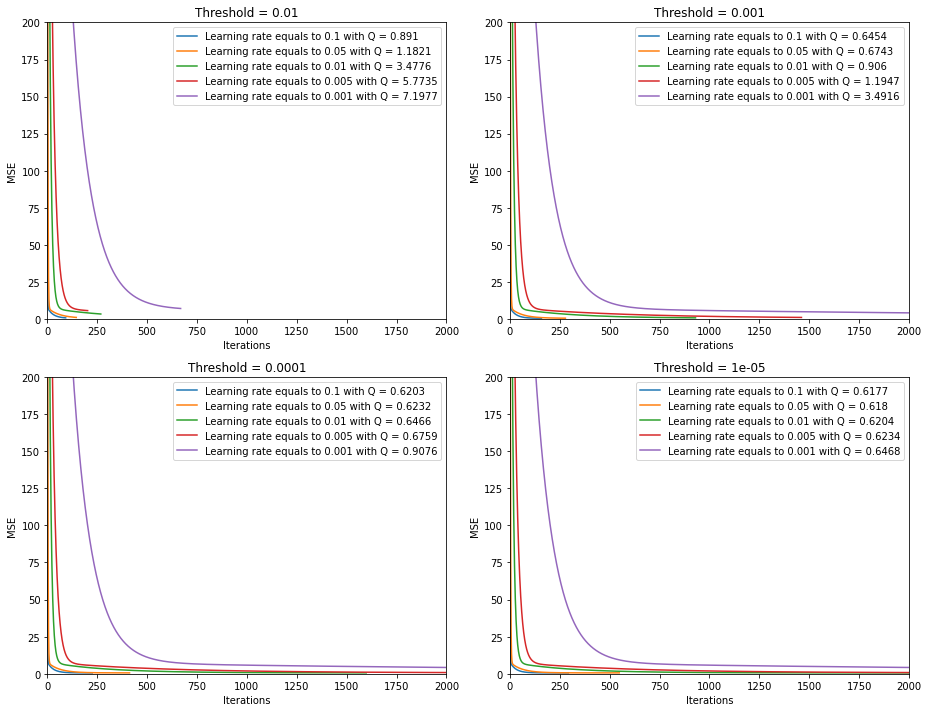

In [15]:
fig = plt.figure()
fig.set_size_inches(13, 10)

thresholds = [1e-2, 1e-3, 1e-4, 1e-5] 
learning_rates = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3]


for i in range(1, len(thresholds)+1):
    ax = fig.add_subplot(2, 2, i)
    q_values = []
    
    for lr in learning_rates:
        GD_model = GradientDescentMse(X, Y, threshold=thresholds[i-1], learning_rate=lr)
        GD_model.learn()
        plt.plot(GD_model.iteration_loss_dict.keys(), GD_model.iteration_loss_dict.values())
        plt.title(f'Threshold = {thresholds[i-1]}')
        plt.xlabel('Iterations')
        plt.ylabel('MSE')
        plt.xlim(0, 2000)
        plt.ylim(0, 200)
        
        q_values.append(str(round(GD_model.calculate_mse_loss(), ndigits=4)))
    
    plt.ylabel('MSE')
    plt.xlabel('Iterations')
    plt.legend([f'Learning rate equals to {learning_rates[i]}' + ' with Q = ' + q_values[i] for i in range(len(learning_rates))])

fig.tight_layout() 

plt.show()

`Threshold = 1e-5` and `learning_rate = 0.1` gives us the smallest MSE by using the least number of iterations.  